<a href="https://colab.research.google.com/github/Angelaestefan/concentracion/blob/master/Proyecto__Minimos_cuadrados_%5BPUBLIC%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio: Implementación desde cero de una Regresión Lineal**

**Objetivo:**

El propósito de este ejercicio es que el estudiante implemente una regresión lineal utilizando el método de mínimos cuadrados sin recurrir a librerías de machine learning (como `scikit-learn`, `statsmodels`, etc.). El desarrollo debe hacerse paso a paso, utilizando únicamente Python básico y librerías numéricas como `numpy`, `pandas` y un par de funciones seccionadas de `scipy.stats.t`.

La meta es comprender de manera profunda el modelo lineal y las métricas asociadas.

# Datos
Tenemos un pequeño conjunto de datos para trabajar con datos:

In [163]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#dataset
df = pd.DataFrame({'x': [8, 12, 12, 13, 14, 16, 17, 22, 24, 26, 29, 30],
                   'y': [41, 42, 39, 38, 40, 39, 45, 46, 42, 49, 55, 57]})

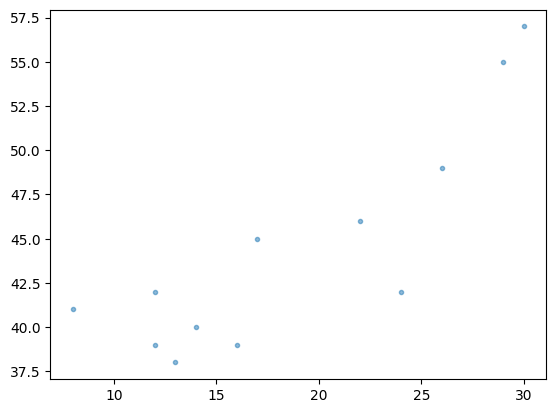

In [164]:
plt.scatter(df['x'], df['y'], marker=".", alpha=0.5)

A continuacion definimos las variables dependientes e independientes:

In [165]:
# definimos la variable dependiente
Y = df['y']

# definimos la variable independiente
X = df['x']

# Modelo lineal
A continuacion definimos las funciones de nuestro modelo y la funcion para obtener nuestras predicciones.

In [166]:
def MODELO(X, Y):
  """ Desarrolla el modelo de regresion lineal utilizando el metodo de tu preferencia,
      Regresa los coeficientes del modelo: intercepto (bias) y pendiente.
  """
  ###
  # Tu codigo va aqui
  x_mean = np.mean(X)
  y_mean = np.mean(Y)
  beta_1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean) ** 2)
  beta_0 = y_mean - beta_1 * x_mean


  ###
  return beta_0, beta_1

def Predict(beta_0, beta_1, X):
  """ Regresa los valores predichos."""
  ###
  # Tu codigo va aqui
  return [beta_0 + beta_1 * x for x in X]
  


  ###
  

# Metricas Estadisticas
En esta seccion, se implementaran los diversa metricas estadisticas que describen la calidad de ajuste de nuestro modelo y los detalles de los coeficientes y datos.

In [167]:
def R2_score(y_true, y_pred):
  """ Calcula y regresa el valor del coeficiente de determinacion """
  ###
  # Tu codigo va aqui
  ss_res = np.sum((y_true - y_pred) ** 2)
  ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
  return 1 - ss_res / ss_tot


  ###
 

In [168]:
def std_error(x, y_true, y_pred):
  """ Calcula y regresa el valor del error estandar de los estimadores b_0 y b_1 [tupla o lista] """
  # HINT:
  ###
  # Tu codigo va aqui
  n = len(x)
  x_mean = np.mean(x)
  s_squared = np.sum((y_true - y_pred) ** 2) / (n - 2)
  s_b1 = np.sqrt(s_squared / np.sum((x - x_mean) ** 2))
  s_b0 = np.sqrt(s_squared * (1/n + x_mean**2 / np.sum((x - x_mean) ** 2)))
  return s_b0, s_b1
  ###


In [169]:
def IC(beta_0, beta_1, x, y_true, y_pred, alpha):
  """ Calcula y regresa los intervalos de confianza (inferior, superior) de los estimadores b_0 y b_1 [tupla o lista] """
  # HINT: puedes utilizar 'stats.t.ppf' para el calculo de valor critico
  ###
  # Tu codigo va aqui
  n = len(x)
  df = n - 2
  s_b0, s_b1 = std_error(x, y_true, y_pred)
  t_crit = stats.t.ppf(1 - alpha/2, df)
  ic_b0 = (beta_0 - t_crit * s_b0, beta_0 + t_crit * s_b0)
  ic_b1 = (beta_1 - t_crit * s_b1, beta_1 + t_crit * s_b1)
  return ic_b0, ic_b1

In [170]:
def T(beta_0, beta_1, x, y_true, y_pred):
  """ Calcula y regresa la estadistica de prueba T para los estimadores b_0 y b_1 [tupla o lista] """
  ###
  # Tu codigo va aqui
  s_b0, s_b1 = std_error(x, y_true, y_pred)
  t_b0 = beta_0 / s_b0
  t_b1 = beta_1 / s_b1
  return t_b0, t_b1

  ###
  

def Pvalue(t_value, df, two_tails=True):
  """ Calcula y regresa el p-value dependiendo si se trata de una prueba de una o dos colas [float] """
  # HINT: puedes utilizar 'stats.t.sf' para el calculo
  ###
  #  Tu codigo va aqui
  if two_tails:
    return 2 * stats.t.sf(abs(t_value), df)
  else:
    return stats.t.sf(abs(t_value), df)

  ###
  

# Comparativa

A continuacion mostramos los resultados obtenidos de un modelos de la libreria de `statsmodels`. Compare los resultados que obtuvo con los resultados obtenidos por el modelo.

In [171]:
import statsmodels.api as sm

# Definicion & fit de un modelo de regresion lineal
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()

# Imprimir el reporte estadistico
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     27.73
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           0.000365
Time:                        19:56:43   Log-Likelihood:                -30.629
No. Observations:                  12   AIC:                             65.26
Df Residuals:                      10   BIC:                             66.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7636      2.772     11.096      0.0

In [172]:
beta_0, beta_1 = MODELO(X, Y)
Predicted_Values = Predict(beta_0, beta_1, X)
r2_score = R2_score(Y, Predicted_Values)
std_err = std_error(X, Y, Predicted_Values)
ic_b0, ic_b1 = IC(beta_0, beta_1, X, Y, Predicted_Values, 0.05)
t_b0, t_b1 = T(beta_0, beta_1, X, Y, Predicted_Values)
p_value_b0 = Pvalue(t_b0, len(X) - 2, two_tails=True)
p_value_b1 = Pvalue(t_b1, len(X) - 2, two_tails=True)
print(f"b_0: {beta_0}, b_1: {beta_1}")
print(f"R^2: {r2_score}")     
print(f"std error b_0: {std_err}")
print(f"IC b_0: {ic_b0}, IC b_1: {ic_b1}")
print(f"t b_0: {t_b0}, t b_1: {t_b1}")
print(f"p-value b_0: {p_value_b0}, p-value b_1: {p_value_b1}")


b_0: 30.763552318251854, b_1: 0.7346967362375684
R^2: 0.7349769943860472
std error b_0: (np.float64(2.7724629854928864), np.float64(0.13951246923402266))
IC b_0: (np.float64(24.58611982464045), np.float64(36.94098481186326)), IC b_1: (np.float64(0.4238435832036793), np.float64(1.0455498892714574))
t b_0: 11.096109300367353, t b_1: 5.266172552685342
p-value b_0: 6.079702528805614e-07, p-value b_1: 0.0003648102532070309


# Otros datos

A continuacion mostramos un conjunto de datos alternativo. Aplica nuevamente el modelo a estos nuevos datos, junto con sus metricas estadisticas.

* **¿Ha percibido algun valor anormal en los coeficientes, intervalos de confianza o P-values? De ser asi, ¿A que se lo adjudica?**

In [173]:
df = pd.DataFrame({'x': [-10.583333333333332,-6.583333333333332, -6.583333333333332, -5.583333333333332, -4.583333333333332, -2.583333333333332, -1.5833333333333321, 3.416666666666668, 5.416666666666668, 7.416666666666668, 10.416666666666668, 11.416666666666668],
                   'y': [-3.4166666666666643, -2.4166666666666643, -5.416666666666664, -6.416666666666664, -4.416666666666664, -5.416666666666664, 0.5833333333333357, 1.5833333333333357, -2.4166666666666643, 4.583333333333336, 10.583333333333336, 12.583333333333336]})

In [174]:
# definimos la variable dependiente
Y = df['y']

# definimos la variable independiente
X = df['x']

In [175]:
def R2_score(y_true, y_pred):
  """ Calcula y regresa el valor del coeficiente de determinacion """
  ###
  # Tu codigo va aqui
  ss_res = np.sum((y_true - y_pred) ** 2)
  ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
  return 1 - ss_res / ss_tot

# Tu codigo va aqui
beta_0, beta_1 = MODELO(X, Y)
Predicted_Values = Predict(beta_0, beta_1, X)
r2_score = R2_score(Y, Predicted_Values)
std_err = std_error(X, Y, Predicted_Values)
ic_b0, ic_b1 = IC(beta_0, beta_1, X, Y, Predicted_Values, 0.05)
t_b0, t_b1 = T(beta_0, beta_1, X, Y, Predicted_Values)
p_value_b0 = Pvalue(t_b0, len(X) - 2, two_tails=True)
p_value_b1 = Pvalue(t_b1, len(X) - 2, two_tails=True)
print(f"b_0: {beta_0}, b_1: {beta_1}")
print(f"R^2: {r2_score}")     
print(f"std error b_0: {std_err}")
print(f"IC b_0: {ic_b0}, IC b_1: {ic_b1}")
print(f"t b_0: {t_b0}, t b_1: {t_b1}")
print(f"p-value b_0: {p_value_b0}, p-value b_1: {p_value_b1}")


b_0: 1.4984200709999033e-15, b_1: 0.7346967362375681
R^2: 0.7349769943860474
std error b_0: (np.float64(0.9823143090122662), np.float64(0.13951246923402263))
IC b_0: (np.float64(-2.1887326767513215), np.float64(2.188732676751324)), IC b_1: (np.float64(0.42384358320367915), np.float64(1.0455498892714572))
t b_0: 1.5253977848562444e-15, t b_1: 5.266172552685341
p-value b_0: 0.9999999999999989, p-value b_1: 0.00036481025320703186


In [176]:
# Tu codigo va aqui
# Definicion & fit de un modelo de regresion lineal
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()

# Imprimir el reporte estadistico
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     27.73
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           0.000365
Time:                        19:56:43   Log-Likelihood:                -30.629
No. Observations:                  12   AIC:                             65.26
Df Residuals:                      10   BIC:                             66.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.109e-15      0.982   2.15e-15      1.0